Big Mart is a supermarket operating on Nepal. The data presented here is the 2013 total sales of 1559 different products in the 10 Big Mart supermarkets in all different cities. The aim in this notebook predict total sales given the features bellow. 

**Item_Identifier**: It is a unique product ID assigned to every distinct item. It consists of an alphanumeric string of length 5

**Item_Weight**: This field includes the weight of the product

**Item_Fat_Content**: This attribute is categorical and describes whether the product is low fat or not. There are 2 categories of this attribute: ['Low Fat', 'Regular']. However, it is important to note that 'Low Fat' has also been written as 'low fat' and 'LF' in dataset, whereas, 'Regular' has been referred as 'reg' as well

**Item_Visibility**: This field mentions the percentage of total display area of all products in a store allocated to the particular product

**Item_Type**: This is a categorical attribute and describes the food category to which the item belongs. There are 16 different categories listed as follows: ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']

**Item_MRP**: This is the Maximum Retail Price (list price) of the product

**Outlet_Identifier**: It is a unique store ID assigned. It consists of an alphanumeric string of length 6

**Outlet_Establishment_Year**: This attribute mentions the year in which store was established

**Outlet_Size**: The attribute tells the size of the store in terms of ground area covered. It is a categorical value and described in 3 categories: ['High', 'Medium', 'Small']

**Outlet_Location_Type**: This field has categorical data and tells about the size of the city in which the store is located through 3 categories: ['Tier 1', 'Tier 2', 'Tier 3']

**Outlet_Type**: This field contains categorical value and tells whether the outlet is just a grocery store or some sort of supermarket. Following are the 4 categories in which the data is divided: ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3']

**Item_Outlet_Sales**: This is the outcome variable to be predicted. It contains the sales of the product in the particulat store

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv("bigmart_train.csv")

# Data proccesing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Looks like the only columns with null values are Item_Weight and Outlet_Size

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode())

In [9]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [10]:
for column in data.columns:
    print(column, ":",len(data[column].unique()))

Item_Identifier : 1559
Item_Weight : 416
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 4
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


Lets see the distribution in our categorical values! I excluded the ones the columns with high unique values since we can't use those effectively.

In [11]:
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for col in categorical_columns:
    print(data[col].value_counts(), "\n")

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Seems like some of the items in the store have 0 visibility. Lets have close look to our date if this is an error.

In [14]:
sum(data['Item_Visibility'] == 0)

526

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

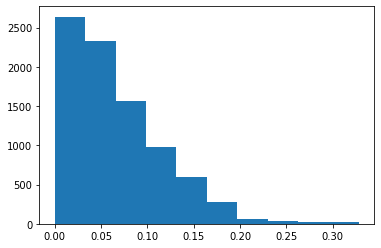

In [15]:
plt.hist(data['Item_Visibility'])

It appears that our data has a right skewed distribution. Lets replace the null values with median! We also may need to normalize this data later to fit gaussian distribution and prevent data leakage.

In [16]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].median())

Our Item_Fat_Content column has multiple values that are actually same but written differently, lets fix this before feature engineering.

In [17]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
data['Item_Fat_Content'].replace("LF", "Low Fat", inplace = True)
data['Item_Fat_Content'].replace("low fat", "Low Fat", inplace = True)
data['Item_Fat_Content'].replace("reg", "Regular", inplace = True)
data['Item_Fat_Content'].replace("Regular", "Regular Fat", inplace = True)
data['Item_Fat_Content'].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
data.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

With some Google research I found that the first 2 character of the Item_Identifer values only have 3 unique values: FD(Food), DR(Drink) and NC(Non consumable, other). Lets try to use information in this column instead of dropping it.

In [20]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4395,FDT31,19.750000,Low Fat,0.012468,Fruits and Vegetables,188.1872,OUT049,Medium,Tier 1,Supermarket Type1,2458.1336
6964,FDH32,12.800000,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,High,Tier 3,Supermarket Type1,2799.6890
6399,DRG36,12.857645,Low Fat,0.094916,Soft Drinks,172.3106,OUT027,Medium,Tier 3,Supermarket Type3,4277.7650
2565,NCN05,8.235000,Low Fat,0.014541,Health and Hygiene,184.4950,OUT017,NaN,Tier 2,Supermarket Type1,3844.9950
6837,DRM11,6.570000,Low Fat,0.066339,Hard Drinks,261.4278,OUT018,Medium,Tier 3,Supermarket Type2,4165.2448


In [21]:
data['Item_Class'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Class'].replace("FD", "Food", inplace = True)
data['Item_Class'].replace("NC", "Non-consumeable", inplace = True)
data['Item_Class'].replace("DR", "Drink", inplace = True)

In [22]:
data['Item_Class']

0                  Food
1                 Drink
2                  Food
3                  Food
4       Non-consumeable
             ...       
8518               Food
8519               Food
8520    Non-consumeable
8521               Food
8522              Drink
Name: Item_Class, Length: 8523, dtype: object

Since we changed some of the values in our Item_Class column to non consumable and non consumable products don't have any fat content we should change those specific rows' Item_Fat_Content to be more accurate.

In [23]:
data.loc[data['Item_Class'] == "Non-consumeable", "Item_Fat_Content"] = "Non-consumeable"
data['Item_Fat_Content'].value_counts()

Low Fat            3918
Regular Fat        3006
Non-consumeable    1599
Name: Item_Fat_Content, dtype: int64

# Explorary Data Analysis

Lets see the distribution in our features! I excluded Item_Identifier and Outlet_Identifier since they are ID values.

Item_Weight


<Figure size 1440x720 with 0 Axes>

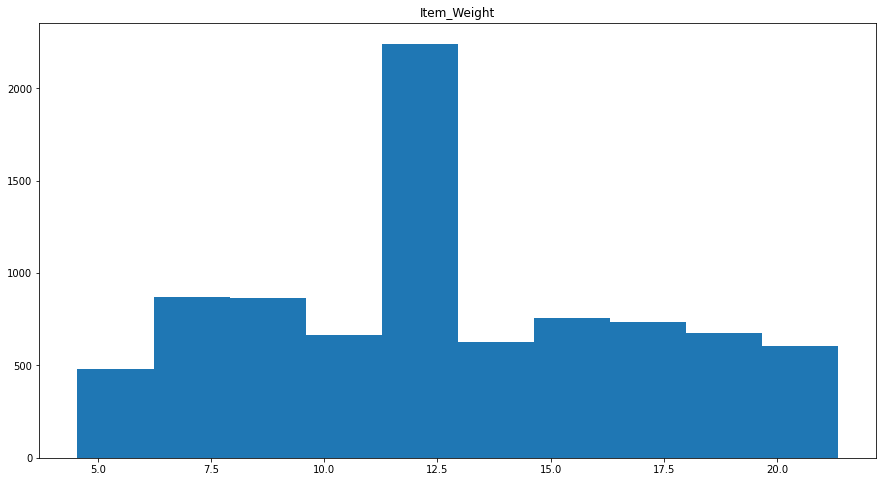

Item_Fat_Content


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


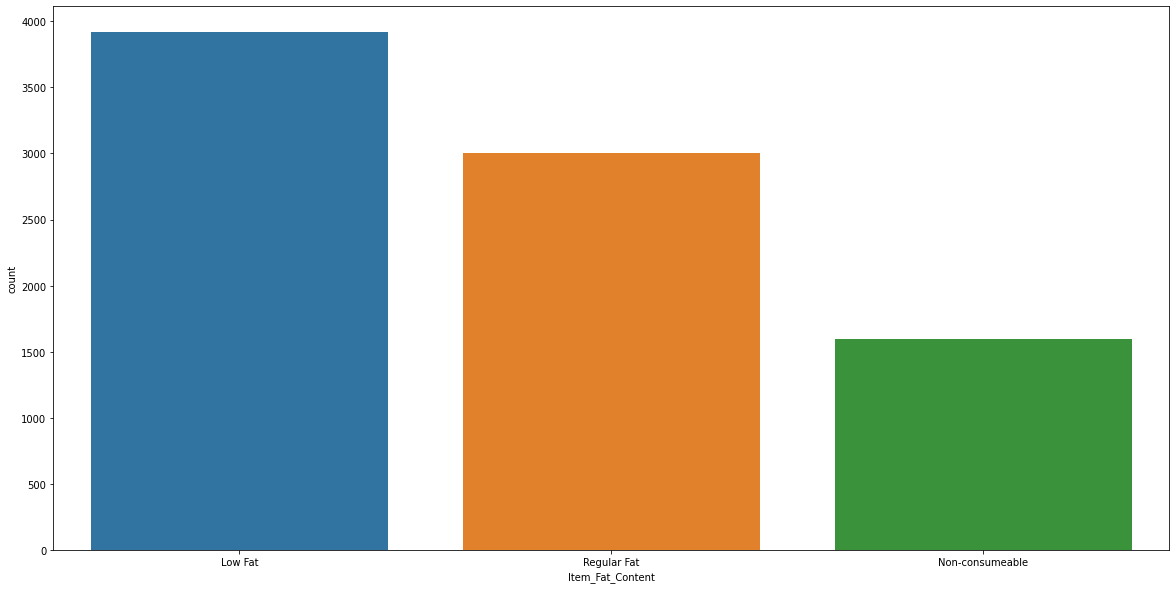

Item_Visibility


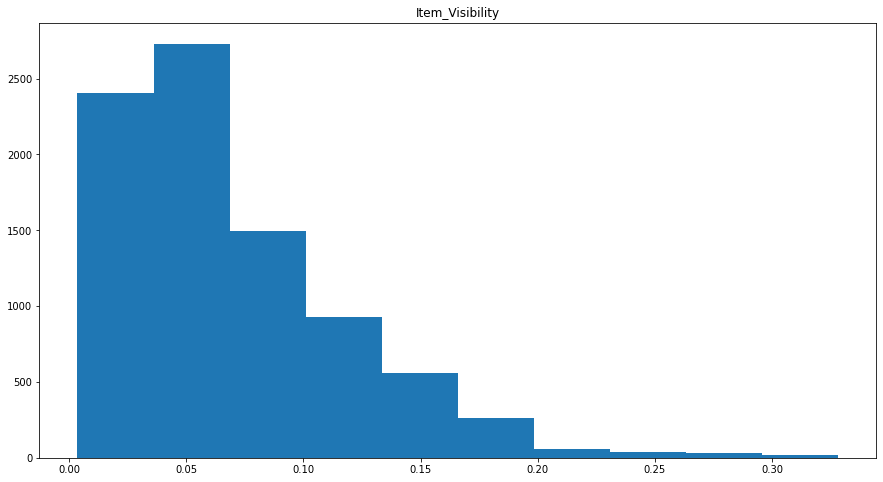

Item_Type


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


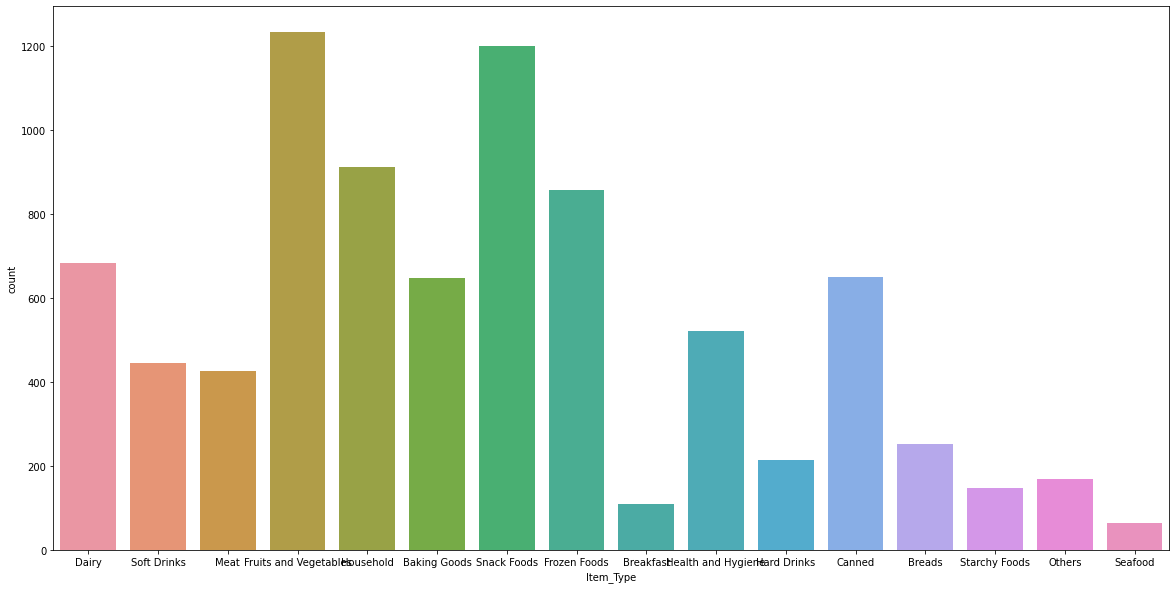

Item_MRP


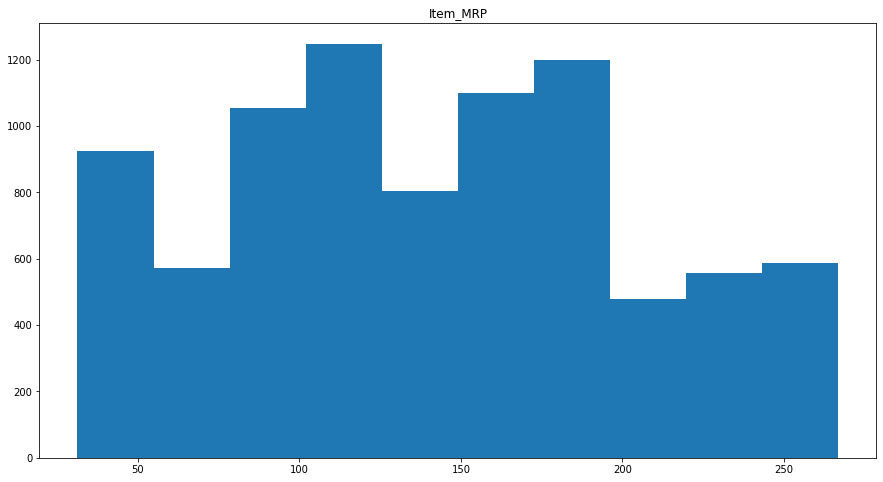

Outlet_Size


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

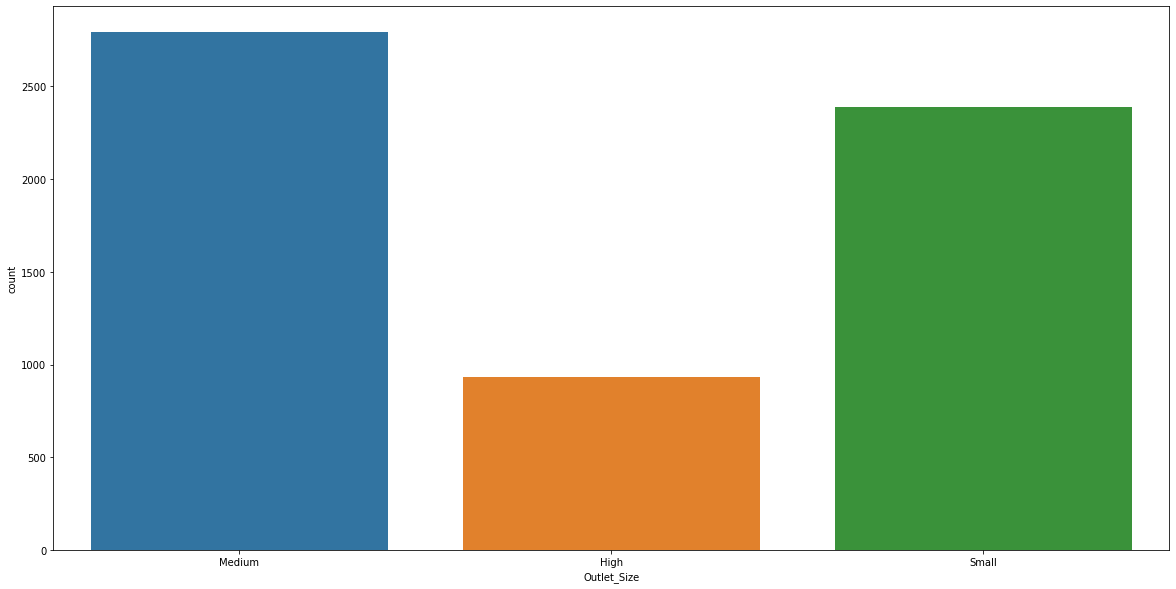

Outlet_Location_Type


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


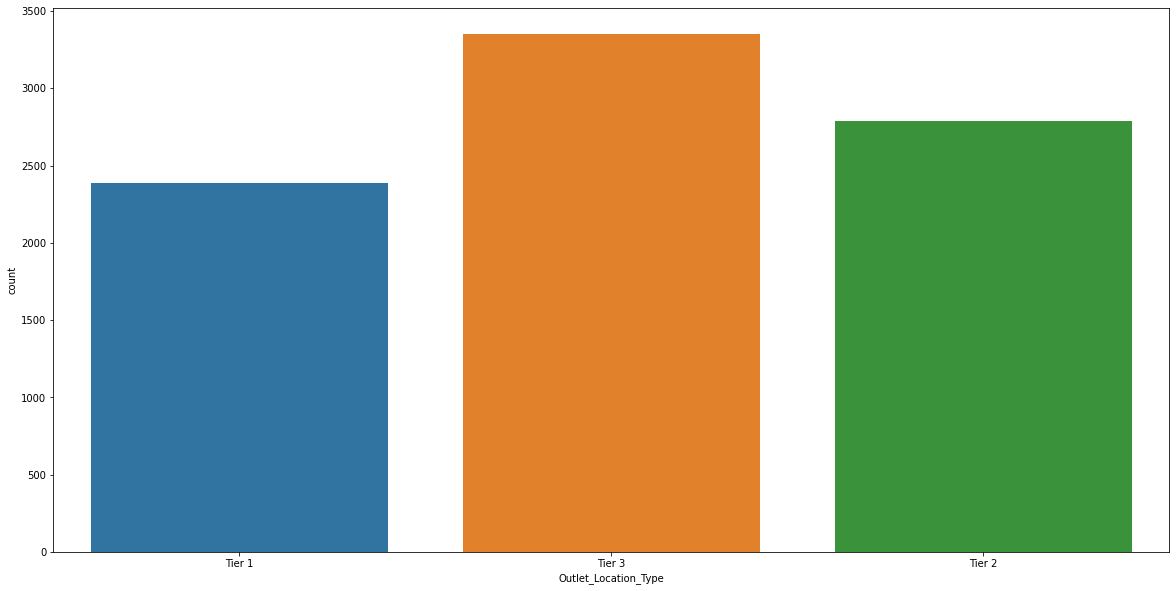

Outlet_Type


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


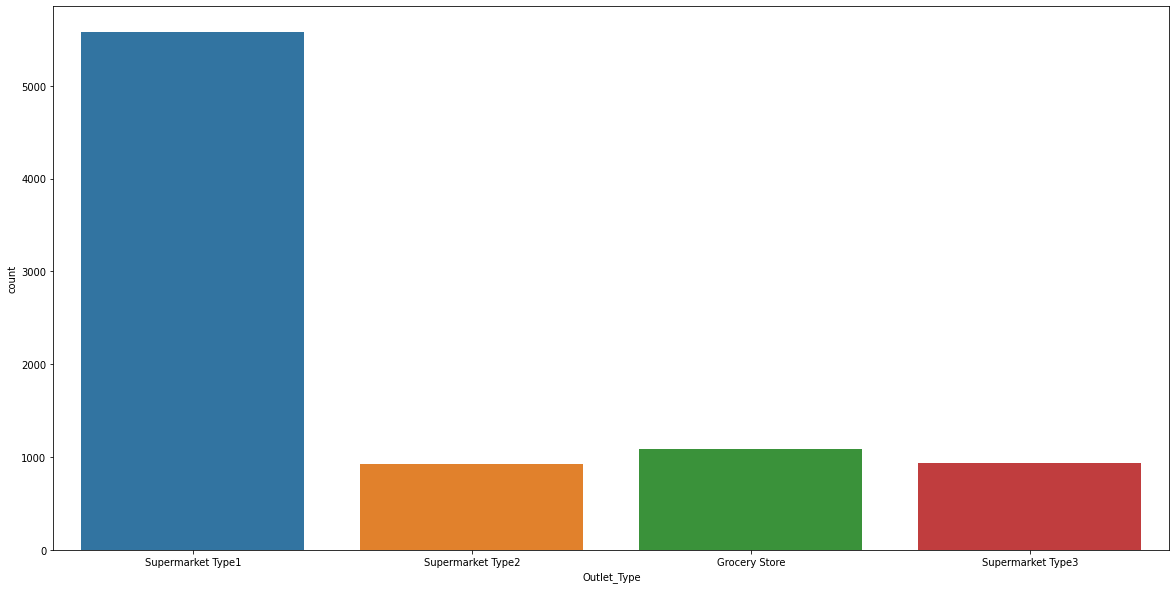

Item_Outlet_Sales


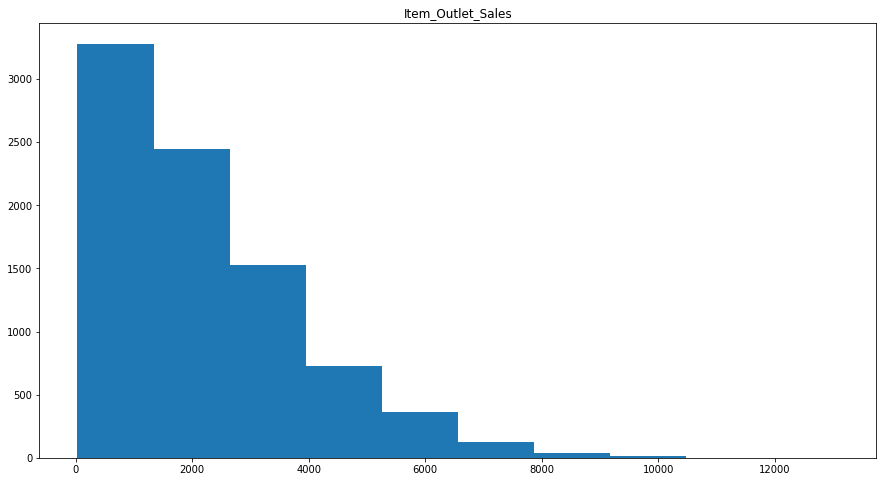

Item_Class


/home/kyustoyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


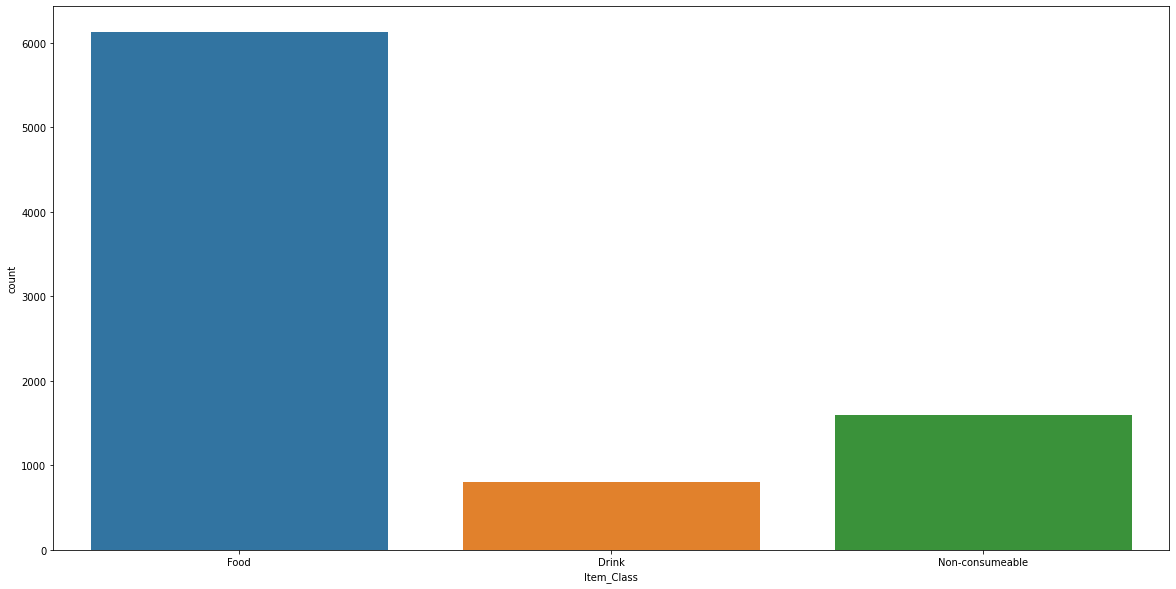

In [24]:
for column in data.columns:
    if data[column].dtype == "O":
        plt.figure(figsize=(20, 10))
        if column not in ['Item_Identifier', 'Outlet_Identifier']:
            print(column)
            sns.countplot(data[column])
            plt.show()
    else:
        plt.figure(figsize=(15, 8))
        print(column)
        plt.hist(data[column])
        plt.title(column)
        plt.show()

Lets not forget that our Item_MRP value has a uniform distribution and  Item_Outlet_Sales and Item_Visibility has a exponential distribution, we need to scale them after splitting the training and testing data.

<AxesSubplot:>

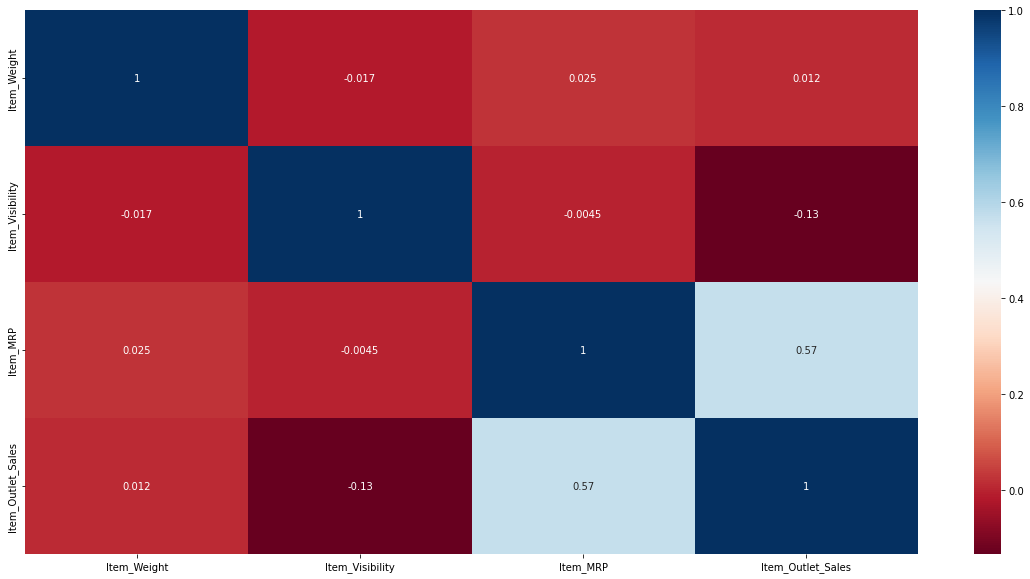

In [25]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")

Looks like there isn't much correlation between the independent continues variables and output values except Item_MRP

# Feature Engineering

Lets transform our Item_Fat_Content and Item_Class features with One hot encoding since they are ordinal and the remaining with Label encoder

In [26]:
columns_to_encode = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in columns_to_encode:
        data[column] = le.fit_transform(data[column].astype(str))

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Class
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1,0,1,3735.1380,Food
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,1,2,2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1,0,1,2097.2700,Food
3,FDX07,19.20,Regular Fat,0.053931,Fruits and Vegetables,182.0950,OUT010,3,2,0,732.3800,Food
4,NCD19,8.93,Non-consumeable,0.053931,Household,53.8614,OUT013,0,2,1,994.7052,Non-consumeable


In [28]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Class'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-consumeable,Item_Fat_Content_Regular Fat,Item_Class_Drink,Item_Class_Food,Item_Class_Non-consumeable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1,0,1,3735.1380,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,1,2,2,443.4228,0,0,1,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1,0,1,2097.2700,1,0,0,0,1,0
3,FDX07,19.20,0.053931,Fruits and Vegetables,182.0950,OUT010,3,2,0,732.3800,0,0,1,0,1,0
4,NCD19,8.93,0.053931,Household,53.8614,OUT013,0,2,1,994.7052,0,1,0,0,0,1


We should drop one column each feature we applied one hot encoding to escape dummy variable trap.

In [29]:
data.drop(['Item_Fat_Content_Non-consumeable', 'Item_Class_Non-consumeable'], axis = 1, inplace = True)

In [30]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Class_Drink,Item_Class_Food
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1,0,1,3735.1380,1,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,1,2,2,443.4228,0,1,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1,0,1,2097.2700,1,0,0,1
3,FDX07,19.20,0.053931,Fruits and Vegetables,182.0950,OUT010,3,2,0,732.3800,0,1,0,1
4,NCD19,8.93,0.053931,Household,53.8614,OUT013,0,2,1,994.7052,0,0,0,0


# Feature Transformation

In [31]:
X = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

from sklearn.preprocessing import power_transform
# Scaling the Item_MRP feature in test split
scaled_features = X_test.copy()
col_names = ['Item_MRP']
features = scaled_features[col_names]
new_data = power_transform(features, method='box-cox')
X_test['Item_MRP'] = new_data

# Scaling the Item_MRP feature in training split
scaled_features = X_train.copy()
col_names = ['Item_MRP']
features = scaled_features[col_names]
new_data = power_transform(features, method='box-cox')
X_train['Item_MRP'] = new_data

Lets use Box Cox transformation for Item_MRP since it has a uniform distribution and cubic root transformation since it has a right skewed distribution.

In [32]:
# Transforming the Item_Visibility feature by power transformation
X_train['Item_Visibility'] = X_train['Item_Visibility'] ** (1 / 3)
X_test['Item_Visibility'] = X_test['Item_Visibility'] ** (1 / 3)

Have a quick look at our new correlation matrix!

<AxesSubplot:>

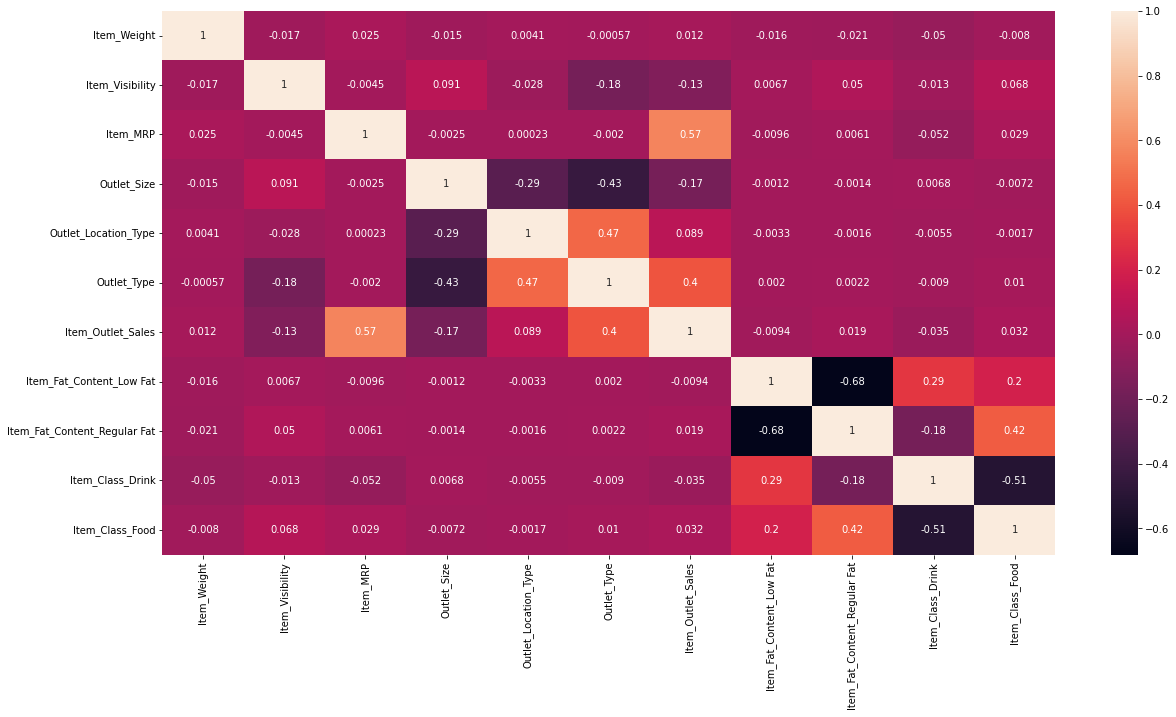

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True)

In [34]:
y_test = power_transform(y_test.copy().values.reshape(-1, 1), method='box-cox')
y_train = power_transform(y_train.copy().values.reshape(-1, 1), method='box-cox')

# Model Fitting

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.548701622177646

In [36]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.3875570046371791

In [37]:
from sklearn.linear_model import SGDRegressor
model3 = SGDRegressor()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

/home/kyustoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5401141731448773

In [38]:
from sklearn.linear_model import Lasso
model4 = Lasso()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

-2.220446049250313e-16

In [39]:
from sklearn import svm
model5 = svm.SVR()
model5.fit(X_train, y_train)
model5.score(X_test, y_test)

/home/kyustoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6340712886301694

In [40]:
from sklearn.linear_model import Ridge
model6 = Ridge()
model6.fit(X_train, y_train)
model6.score(X_test, y_test)

0.5486626695651673

In [41]:
from sklearn.linear_model import ElasticNet
model7 = ElasticNet()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.044947406170260495

In [42]:
from sklearn.ensemble import RandomForestRegressor
model8 = RandomForestRegressor()
model8.fit(X_train, y_train)
model8.score(X_test, y_test)

/tmp/ipykernel_15198/502058362.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model8.fit(X_train, y_train)


0.6632504534030312

In [43]:
print("Model1", model.score(X_test, y_test))
print("Model2", model2.score(X_test, y_test))
print("Model3", model3.score(X_test, y_test))
print("Model4", model4.score(X_test, y_test))
print("Model5", model5.score(X_test, y_test))
print("Model6", model6.score(X_test, y_test))
print("Model7", model7.score(X_test, y_test))
print("Model8", model8.score(X_test, y_test))

Model1 0.548701622177646
Model2 0.3875570046371791
Model3 0.5401141731448773
Model4 -2.220446049250313e-16
Model5 0.6340712886301694
Model6 0.5486626695651673
Model7 0.044947406170260495
Model8 0.6632504534030312


Lets investigate the RandomForestRegressor.

In [44]:
print("Model8", model8.score(X_train, y_train))

Model8 0.9510686468775648


-2.667810472850527e-16


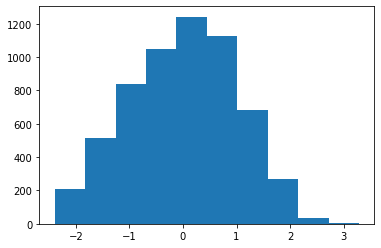

In [45]:
print(y_train.mean())
plt.hist(y_train)
plt.show()

3.925074752683385e-16


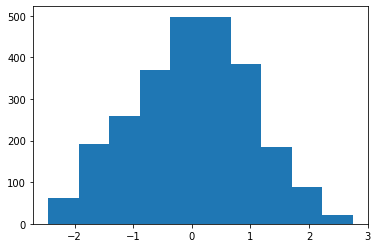

In [46]:
print(y_test.mean())
plt.hist(y_test)
plt.show()

<BarContainer object of 10 artists>

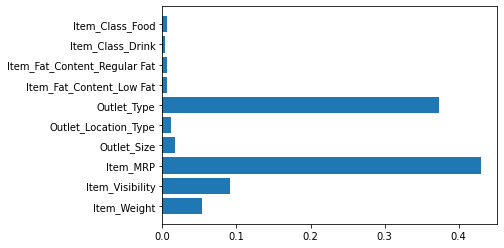

In [47]:
plt.barh(X_train.columns, model8.feature_importances_)

Seems like our model has overfit the data, parameter tuning may fix this issue.

In [48]:
print(model8.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [49]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
random_grid = {
                'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [3, 5, 7, 9, 11, 15],
                'bootstrap': [True, False]
                }
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9, 11, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 20, 40, 50, 100,
                                                         150, 200, 500]},
                   random_state=42, verbose=2)

In [50]:
rf_random.score(X_train, y_train)

0.7038307270727907

In [51]:
rf_random.score(X_test, y_test)

0.6968327275266591

<BarContainer object of 10 artists>

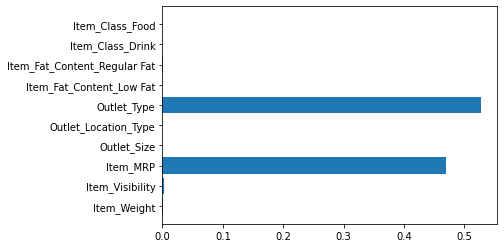

In [52]:
plt.barh(X_train.columns, rf_random.best_estimator_.feature_importances_)

Looks like parameter tuning helped us little bit and improved accuracy by .04. Our best algorithm now is Random forest regressor with .69 R^2 score!